# **Forecasting IMERG Data Using Python**

Importing the needed libraries

In [2]:
!pip install earthaccess

  Using cached earthaccess-0.15.1-py3-none-any.whl.metadata (9.6 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached multimethod-2.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached pqdm-0.2.0-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached python_cmr-0.13.0-py3-none-any.whl.metadata (10 kB)
  Using cached s3fs-2025.9.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached tinynetrc-1.3.1-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached bounded_pool_executor-0.0.3-py3-none-any.whl.metadata (2.7 kB)
Using cached earthaccess-0.15.1-py3-none-any.whl (70 kB)
Using cached fsspec-2025.9.0-py3-none-any.whl (199 kB)
Using cached multimethod-2.0-py3-none-any.whl (9.8 kB)
Using cached pqdm-0.2.0-py2.py3-none-any.whl (6.8 kB)
Using cached python_cmr-0.13.0-py3-none-any.whl (14 kB)
Using cached s3fs-2025.9.0-py3-none-any.whl (30 kB)
Using cached tinynetrc-1.3.1-py2.py3-none-any.whl (3.9 kB)
Using cached bounded_pool_executor-0.0.3-py3-none-any.whl (3.4 kB)
 

In [4]:
!pip install cartopy

  Using cached cartopy-0.25.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached shapely-2.1.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.8 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached pyproj-3.7.2-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (31 kB)
Using cached cartopy-0.25.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (11.8 MB)
Using cached pyproj-3.7.2-cp312-cp312-manylinux_2_28_x86_64.whl (9.6 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Using cached shapely-2.1.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.1 MB)


In [5]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optr

In [6]:
!pip install --upgrade "protobuf==5.28.3" googleapis-common-protos

  Using cached protobuf-5.28.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
Using cached protobuf-5.28.3-cp38-abi3-manylinux2014_x86_64.whl (316 kB)
Using cached googleapis_common_protos-1.70.0-py3-none-any.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.2
    Uninstalling protobuf-5.28.2:
      Successfully uninstalled protobuf-5.28.2
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.65.0
    Uninstalling googleapis-common-protos-1.65.0:
      Successfully uninstalled googleapis-common-protos-1.65.0


In [7]:
import earthaccess
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
import seaborn as sns
from sklearn.model_selection import train_test_split

Login to earthacces using GES creds

In [9]:
auth = earthaccess.login(strategy="interactive", persist=True)

Search for IMERGM data

In [10]:
results = earthaccess.search_data(
    short_name="GPM_3IMERGM",
    version="07",
    temporal=('2020-01-01'),
    bounding_box=(22.0, 25.0, 32.0, 36.0)
    
)

# Print search results
print( results)
print(len(results))

[Collection: {'ShortName': 'GPM_3IMERGM', 'Version': '07'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2020-01-01T00:00:00.000Z', 'EndingDateTime': '2020-01-31T23:59:59.999Z'}}
Size(MB): 17.121475219726562
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGM.07/2020/3B-MO.MS.MRG.3IMERG.20200101-S000000-E235959.01.V07B.HDF5'], Collection: {'ShortName': 'GPM_3IMERGM', 'Version': '07'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2020-02-01T00:00:00.000Z', 'EndingDateTime': '2020-02-29T23:59:59.999Z'}}
S

Lets check the size of the dataset combined:

In [11]:
print(sum([ i.get("size",0) for i in results]))

1155.551251411438


1.1 GB worth of data. we need to keep that in consideration when training the model to prevent exceeding ram limit.
Lets now download the dataset

In [12]:
downloaded_files = earthaccess.download(
    results,
    local_path='.',
)

QUEUEING TASKS | :   0%|          | 0/65 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/65 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/65 [00:00<?, ?it/s]

In [13]:
!pip install cftime

  Using cached cftime-1.6.4.post1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)


In [14]:
ds = xr.open_mfdataset(downloaded_files, group="Grid", parallel=True, chunks={'time': 1},decode_times =False)
ds

<xarray.Dataset> Size: 8GB
Dimensions:                         (time: 65, nv: 2, lon: 3600, lonv: 2,
                                     lat: 1800, latv: 2)
Coordinates:
  * time                            (time) int32 260B 1261872000 ... 1430092800
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float32 7kB -89.95 -89.85 ... 89.95
Dimensions without coordinates: nv, lonv, latv
Data variables:
    time_bnds                       (time, nv) int32 520B dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds                        (time, lon, lonv) float32 2MB dask.array<chunksize=(1, 3600, 2), meta=np.ndarray>
    lat_bnds                        (time, lat, latv) float32 936kB dask.array<chunksize=(1, 1800, 2), meta=np.ndarray>
    precipitation                   (time, lon, lat) float32 2GB dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 2GB dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lon, lat) float32 2GB dask.array<chunksize=(1, 291, 1800), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lon, lat) float32 2GB dask.array<chunksize=(1, 291, 1800), meta=np.ndarray>
    precipitationQualityIndex       (time, lon, lat) float32 2GB dask.array<chunksize=(1, 145, 1800), meta=np.ndarray>
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

In [15]:
# define bounding box for Egypt
lat_min, lat_max = 27.0, 32.0
lon_min, lon_max = 28.0, 35.0

# crop dataset
ds_cropped = ds.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)

In [16]:
precip = ds_cropped['precipitation']

In [17]:
import numpy as np

print(precip.dims)
print(precip.shape)

n_rows = np.prod(precip.shape)
print(f"Estimated DataFrame rows: {n_rows:,}")


('time', 'lon', 'lat')
(65, 70, 50)
Estimated DataFrame rows: 227,500


In [18]:
df = precip.to_dataframe(name='precipitation').reset_index()

In [19]:
df["precipitation"] = np.where(df["precipitation"] > 0.02,1,0)

In [20]:
df["time"] = pd.to_datetime(df["time"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227500 entries, 0 to 227499
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   time           227500 non-null  datetime64[ns]
 1   lon            227500 non-null  float32       
 2   lat            227500 non-null  float32       
 3   precipitation  227500 non-null  int64         
dtypes: datetime64[ns](1), float32(2), int64(1)
memory usage: 5.2 MB


In [22]:
df.head()

,time,lon,lat,precipitation
0,1970-01-01 00:00:01.261872,28.049999,27.049999,0
1,1970-01-01 00:00:01.261872,28.049999,27.150000,0
2,1970-01-01 00:00:01.261872,28.049999,27.250000,0
3,1970-01-01 00:00:01.261872,28.049999,27.349998,0
4,1970-01-01 00:00:01.261872,28.049999,27.449999,0


In [23]:
df.describe()

,time,lon,lat,precipitation
count,227500,227500.000000,227500.000000,227500.000000
mean,1970-01-01 00:00:01.346003003,31.500000,29.500000,0.117578
min,1970-01-01 00:00:01.261872,28.049999,27.049999,0.000000
25%,1970-01-01 00:00:01.303862400,29.750000,28.250000,0.000000
50%,1970-01-01 00:00:01.346025600,31.499999,29.499999,0.000000
75%,1970-01-01 00:00:01.388102400,33.250000,30.750000,0.000000
max,1970-01-01 00:00:01.430092800,34.950001,31.949999,1.000000
std,NaN,2.020512,1.443090,0.322109


In [24]:
df["precipitation"].value_counts()

precipitation
0    200751
1     26749
Name: count, dtype: int64

In [25]:
26749*100/(200751+26749)
#rain has a daily prob of 12% only!

11.757802197802198

<Axes: xlabel='lat', ylabel='lon'>

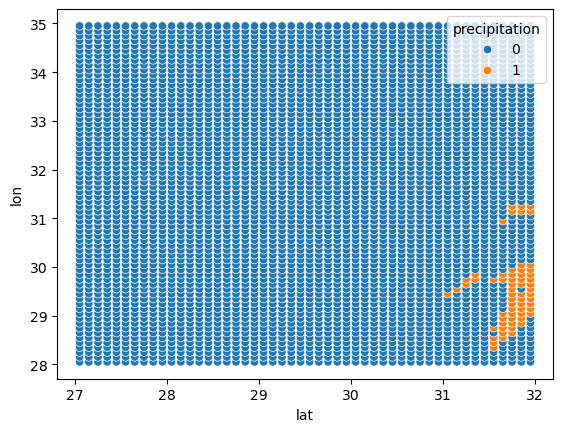

In [26]:
sns.scatterplot(x=df["lat"],y=df["lon"],hue=df["precipitation"],data=df)

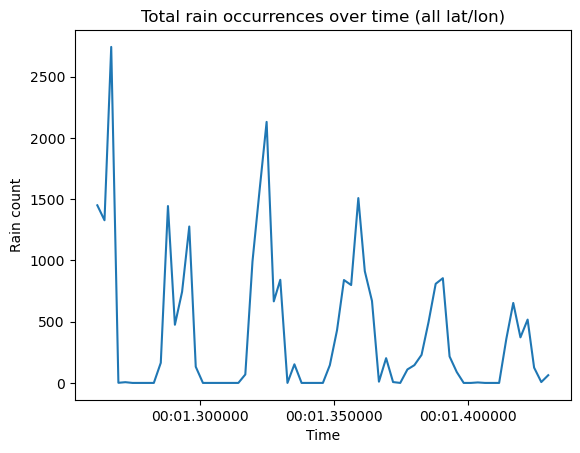

In [29]:
df_sum = df.groupby("time", as_index=False)["precipitation"].sum()

# Simple line plot of total rain counts over time
sns.lineplot(x="time", y="precipitation", data=df_sum)
plt.title("Total rain occurrences over time (all lat/lon)")
plt.ylabel("Rain count")
plt.xlabel("Time")
plt.show()

In [32]:
df = df.dropna(subset=['time']).sort_values('time').reset_index(drop=True)

In [33]:
dt = df['time'].dt
hour = dt.hour.fillna(0)
dow  = dt.dayofweek.fillna(0)       
doy  = dt.dayofyear.fillna(1)       

    # Cyclic encodings
df['hour_sin'] = np.sin(2*np.pi*hour/24)
df['hour_cos'] = np.cos(2*np.pi*hour/24)
df['dow_sin']  = np.sin(2*np.pi*dow/7)
df['dow_cos']  = np.cos(2*np.pi*dow/7)
df['doy_sin']  = np.sin(2*np.pi*doy/366)
df['doy_cos']  = np.cos(2*np.pi*doy/366)
month = dt.month.fillna(1)
df['mon_sin']  = np.sin(2*np.pi*month/12)
df['mon_cos']  = np.cos(2*np.pi*month/12)

In [43]:
X = df.drop(["precipitation","time"],axis=1)
y= df["precipitation"]
sc = StandardScaler()
X[["lon", "lat"]] = sc.fit_transform(X[["lon", "lat"]])

In [44]:
n = len(df)
i_cal = int(n*0.60)
i_test = int(n*0.80)

X_tr, y_tr = X.iloc[:i_cal], y.iloc[:i_cal]
X_cal, y_cal = X.iloc[i_cal:i_test], y.iloc[i_cal:i_test]
X_te,  y_te  = X.iloc[i_test:], y.iloc[i_test:]

In [37]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 84.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 114.5 MB/s eta 0:00:0000:0100:01


In [41]:
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [40]:
xgb = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42,
)

In [46]:
xgb.fit(X_tr, y_tr)
cal = CalibratedClassifierCV(estimator=xgb, method='isotonic', cv='prefit')
cal.fit(X_cal, y_cal)

CalibratedClassifierCV(cv='prefit',
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.9,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None,
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=6,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=600, n_jobs=-1,
                                               num_parallel_tree=None, ...),
                       method='isotonic')

In [48]:
from sklearn.metrics import brier_score_loss, log_loss, roc_auc_score
p = cal.predict_proba(X_te)[:, 1]
print("Brier:", brier_score_loss(y_te, p))
print("LogLoss:", log_loss(y_te, p))
print("ROC-AUC:", roc_auc_score(y_te, p))


Brier: 0.03997132660665832
LogLoss: 0.12862400166754673
ROC-AUC: 0.932046741277156


In [49]:
import joblib

# Save the model
joblib.dump(cal, "rain_model.pkl")  


['rain_model.pkl']